In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Exploratory Data Analysis

In [2]:
df = pd.read_csv('data/Housing.csv')

In [3]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [21]:
df.shape

(545, 13)

In [5]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [6]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [7]:
# Ranges for numeric columns
numeric_cols = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
for col in numeric_cols:
    print(f"{col}: min={df[col].min()}, max={df[col].max()}")

price: min=1750000, max=13300000
area: min=1650, max=16200
bedrooms: min=1, max=6
bathrooms: min=1, max=4
stories: min=1, max=4
parking: min=0, max=3


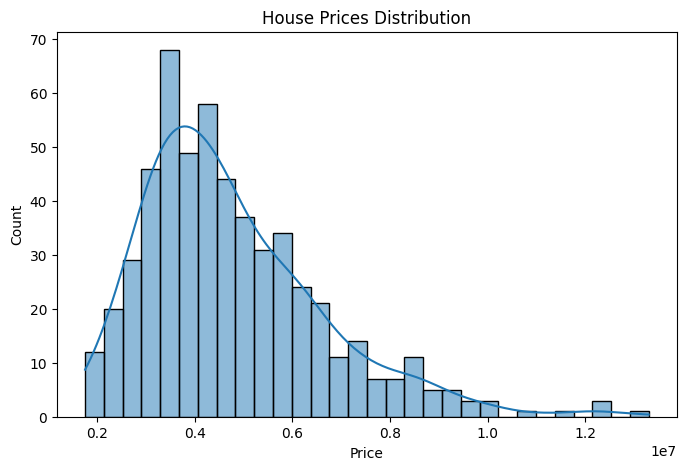

In [8]:
# Target variable analysis
plt.figure(figsize=(8,5))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('House Prices Distribution')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

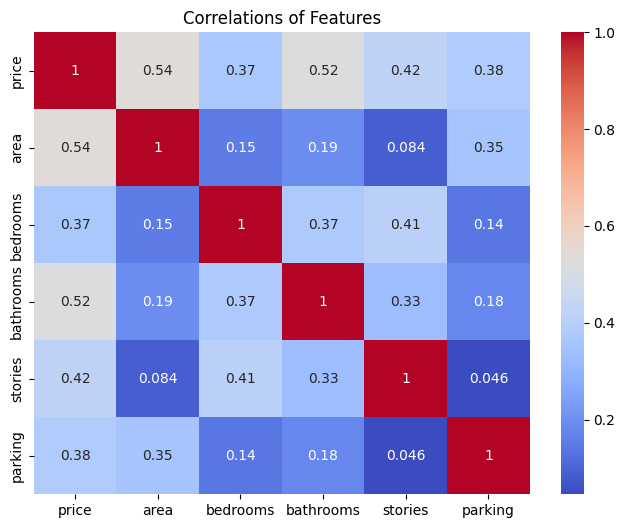

In [9]:
# Correlation heatmap for numerical features
plt.figure(figsize=(8,6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlations of Features')
plt.show()

In [10]:
# Value counts for categorical features
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating',
                    'airconditioning', 'prefarea', 'furnishingstatus']
for col in categorical_cols:
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts())


Value counts for mainroad:
mainroad
yes    468
no      77
Name: count, dtype: int64

Value counts for guestroom:
guestroom
no     448
yes     97
Name: count, dtype: int64

Value counts for basement:
basement
no     354
yes    191
Name: count, dtype: int64

Value counts for hotwaterheating:
hotwaterheating
no     520
yes     25
Name: count, dtype: int64

Value counts for airconditioning:
airconditioning
no     373
yes    172
Name: count, dtype: int64

Value counts for prefarea:
prefarea
no     417
yes    128
Name: count, dtype: int64

Value counts for furnishingstatus:
furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64


# Feature Importance

In [11]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor

In [12]:
# Encoding the categorical columns
df_encoded = df.copy()
le_dict = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    le_dict[col] = le

In [13]:
X = df_encoded.drop('price', axis=1)
y = df_encoded['price']

In [14]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X, y)
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Feature Importances (RandomForest):")
print(importances)

Feature Importances (RandomForest):
area                0.464784
bathrooms           0.154948
parking             0.061491
stories             0.055532
furnishingstatus    0.055284
airconditioning     0.055122
bedrooms            0.042762
prefarea            0.034899
basement            0.030898
guestroom           0.017785
hotwaterheating     0.016831
mainroad            0.009665
dtype: float64


# Model Training

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
print(f'Linear Regression RMSE: {rmse_lr:.2f}')

Linear Regression RMSE: 1331071.42


In [18]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

In [19]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
print(f'Decision Tree RMSE: {rmse_dt:.2f}')

Decision Tree RMSE: 1639566.30
